### **Importing Required Libraries**

In [ ]:
import os
from os.path import exists, join, basename, splitext

In [ ]:
import sys
sys.path.append('Detectron')
import os
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False
import cv2
from IPython.display import clear_output

### **Cloning Detectron Github Repo**

In [3]:
!git clone 'https://github.com/facebookresearch/Detectron.git'

Cloning into 'Detectron'...
remote: Enumerating objects: 1377, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 1377 (delta 1), reused 2 (delta 0), pack-reused 1370
Receiving objects: 100% (1377/1377), 4.38 MiB | 16.69 MiB/s, done.
Resolving deltas: 100% (824/824), done.


### **Installing the Requirements**

In [4]:
!cd Detectron && pip install -q -r requirements.txt

     |████████████████████████████████| 375 kB 5.4 MB/s 


### **Building Detectron**

In [5]:
!cd Detectron && make

python setup.py develop --user
Compiling detectron/utils/cython_bbox.pyx because it changed.
Compiling detectron/utils/cython_nms.pyx because it changed.
[1/2] Cythonizing detectron/utils/cython_bbox.pyx
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/Detectron/detectron/utils/cython_bbox.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/2] Cythonizing detectron/utils/cython_nms.pyx
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/Detectron/detectron/utils/cython_nms.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running develop
running egg_info
creating Detectron.egg-info
writing Detectron.egg-info/PKG-INFO
writing dependency_links to Detectron.egg-info/dependency_lin

### **Testing Detectron Build**

In [6]:
!python Detectron/detectron/tests/test_spatial_narrow_as_op.py 

[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
Found Detectron ops lib: /usr/local/lib/python3.7/dist-packages/torch/lib/libcaffe2_detectron_ops_gpu.so
...
----------------------------------------------------------------------
Ran 3 tests in 15.334s

OK


### **Creating Directory and Downloading Images for Inference**

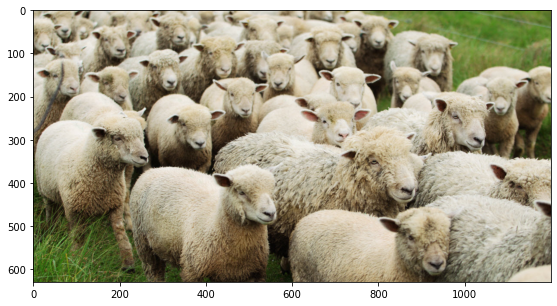

In [15]:
IMAGE_URL = 'https://www.raisingsheep.net/wp-content/uploads/2021/02/what-is-a-group-of-sheep-called.jpg'

image_file = basename(IMAGE_URL)
image_file_ext = splitext(image_file)[1][1:]
images_dir = 'images'
!mkdir -p $images_dir && rm -rf $images_dir/*
!wget -q -O $images_dir/$image_file $IMAGE_URL

plt.figure(figsize=(10, 5))
plt.imshow(matplotlib.image.imread(join(images_dir, image_file)))

### **Inferencing on Downloaded Images**

In [16]:
MODEL_CFG = 'e2e_mask_rcnn_X-101-64x4d-FPN_1x.yaml'
PRETRAINED_MODEL_URL = 'https://dl.fbaipublicfiles.com/detectron/36494496/12_2017_baselines/e2e_mask_rcnn_X-101-64x4d-FPN_1x.yaml.07_50_11.fkwVtEvg/output/train/coco_2014_train%3Acoco_2014_valminusminival/generalized_rcnn/model_final.pkl'


!cd Detectron && python tools/infer_simple.py \
    --cfg configs/12_2017_baselines/$MODEL_CFG \
    --wts $PRETRAINED_MODEL_URL \
    --thresh 0.7 \
    --output-dir ../output/ --output-ext png --always-out \
    --image-ext $image_file_ext \
    ../$images_dir

Found Detectron ops lib: /usr/local/lib/python3.7/dist-packages/torch/lib/libcaffe2_detectron_ops_gpu.so
[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
WARNING cnn.py:  25: [====DEPRECATE WARNING====]: you are creating an object from CNNModelHelper class which will be deprecated soon. Please use ModelHelper object with brew module. For more information, please refer to caffe2.ai and python/brew.py, python/brew_test.py for more information.
INFO net.py:  60: Loading weights from: /tmp/detectron-download-cache/3649

### **Visualising Test Images**

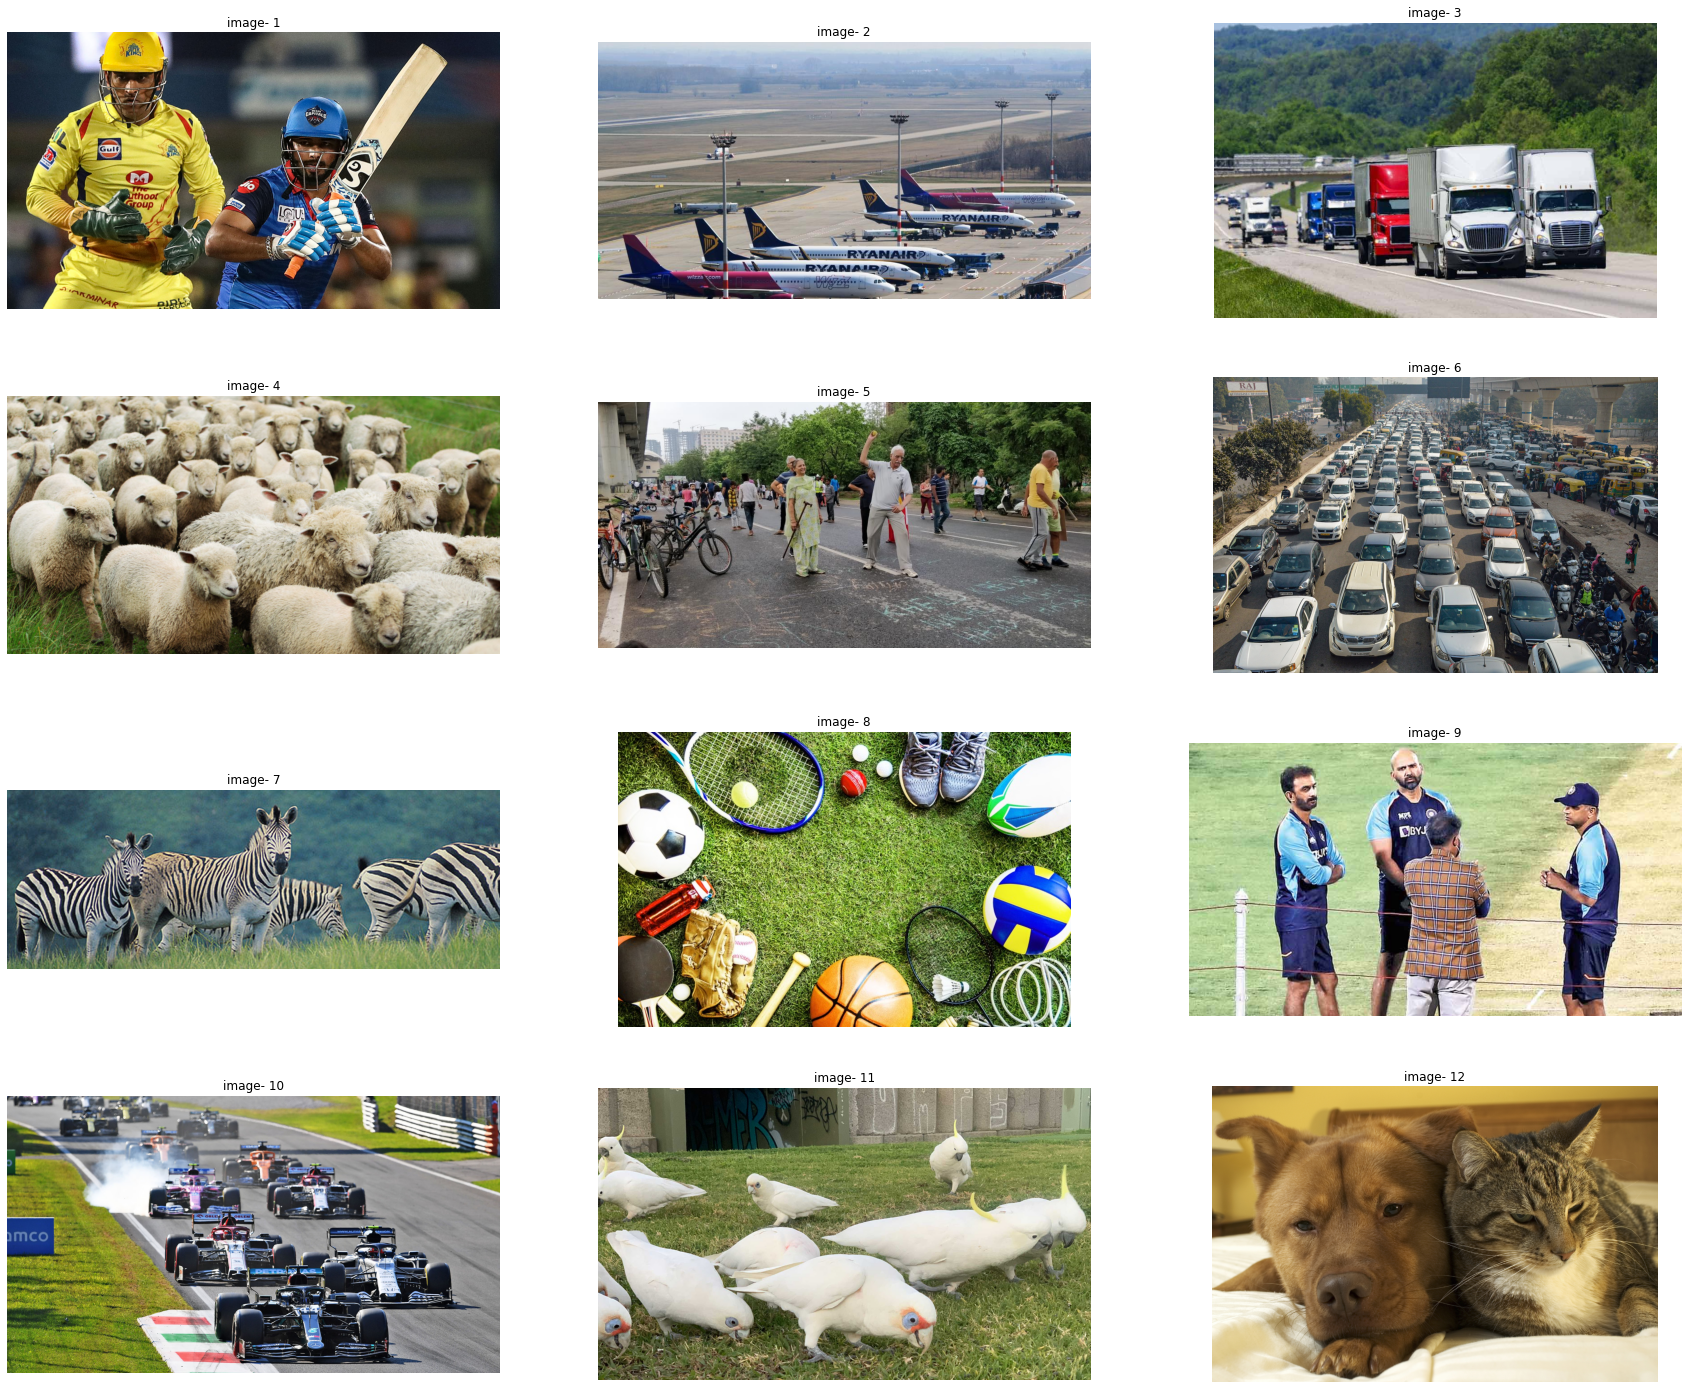

In [20]:
plt.figure(figsize=(30,25))
for en, im in enumerate(os.listdir('images')):
    image = cv2.imread('images/'+im)
    plt.subplot(4,3,en+1);plt.imshow(image[...,::-1]);plt.axis('off');plt.title('image- '+str(en+1));

### **Visualising Instance Segmentation Output using Mask-RCNN**

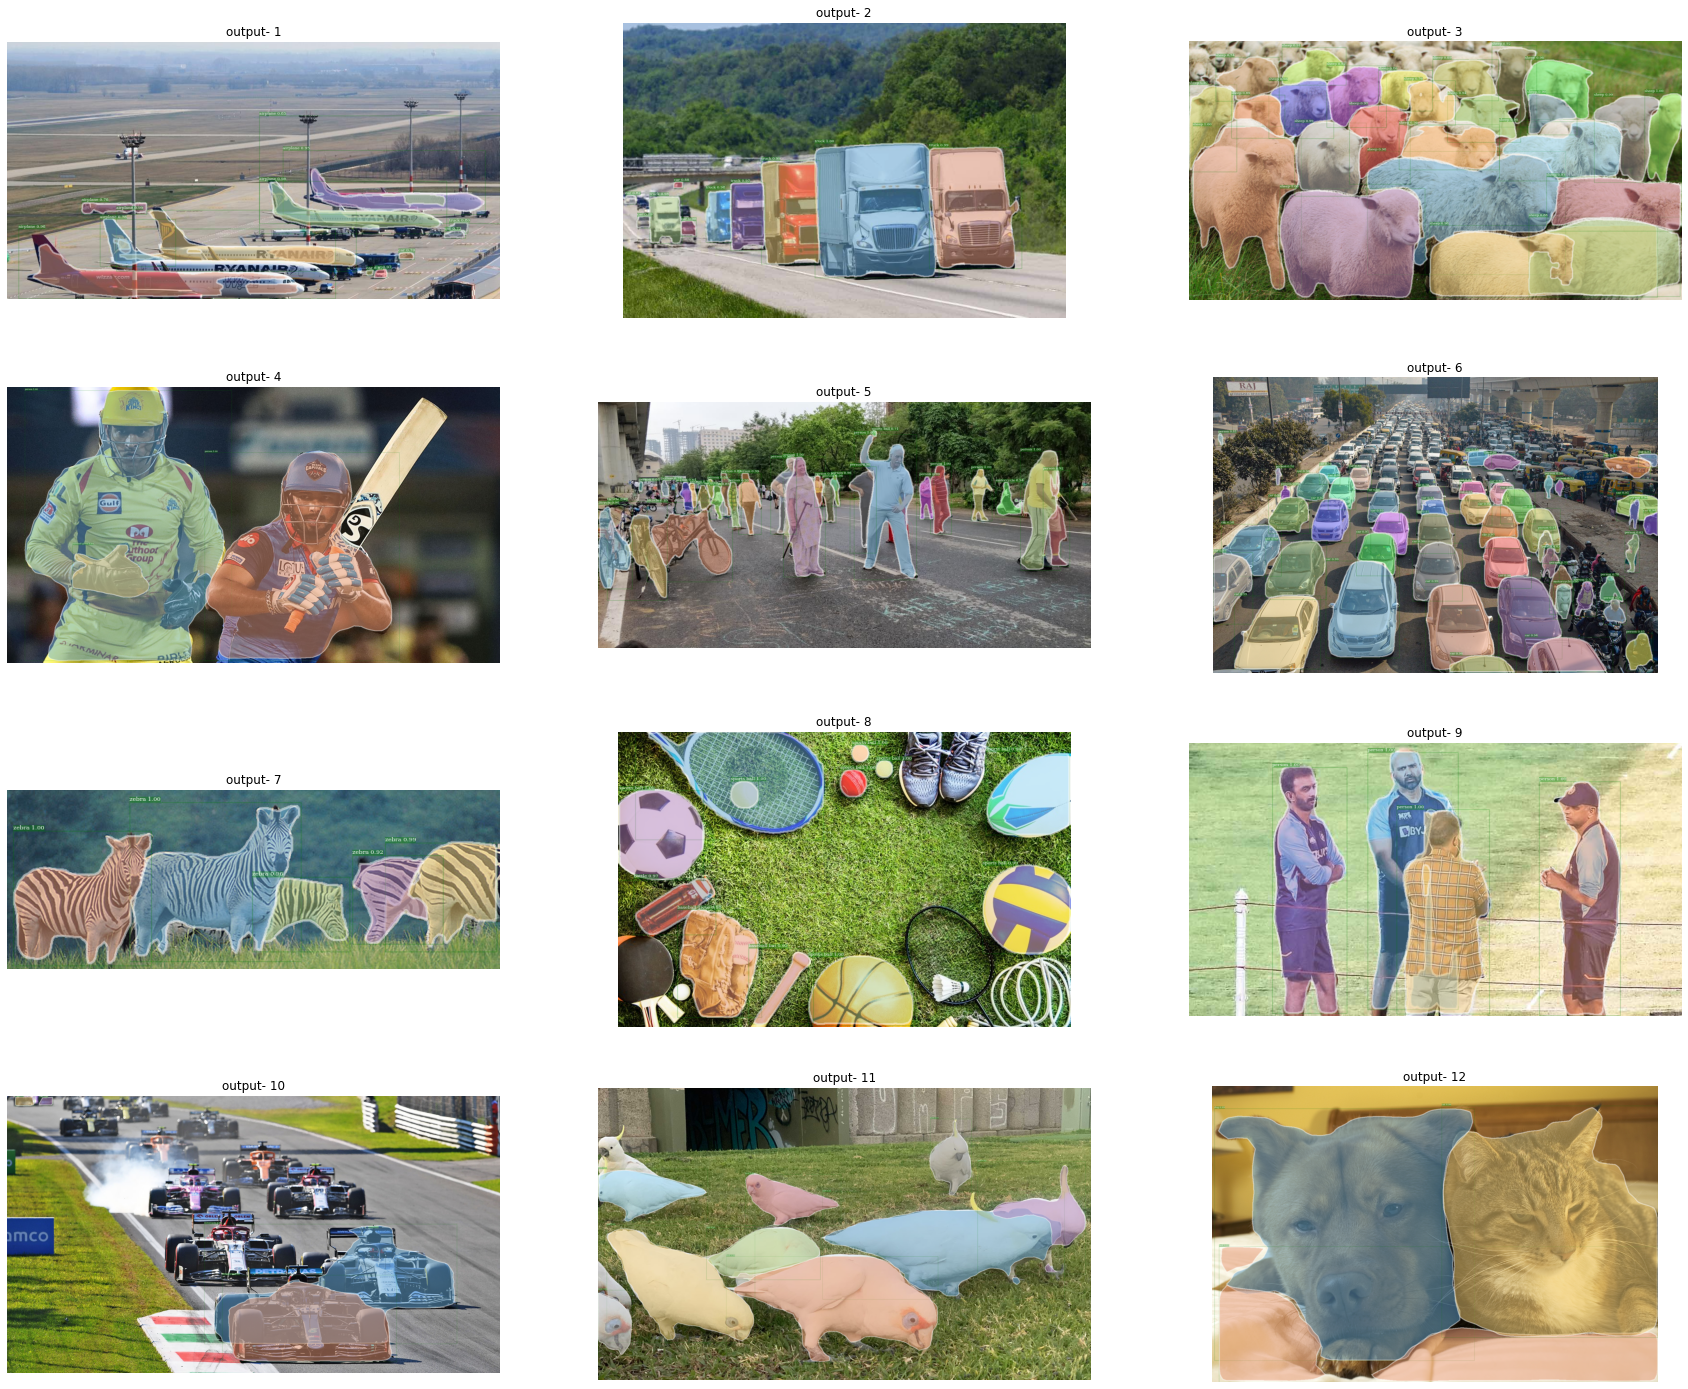

In [19]:
plt.figure(figsize=(30,25))
for en, im in enumerate(os.listdir('output')):
    image = cv2.imread('output/'+im)
    plt.subplot(4,3,en+1);plt.imshow(image[...,::-1]);plt.axis('off');plt.title('output- '+str(en+1));